In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.table import Table, join, vstack
from astropy.io import ascii

In [2]:
!pip install -q cosmic-popsynth==3.1.0

     |████████████████████████████████| 266kB 5.6MB/s 
     |████████████████████████████████| 4.3MB 42.6MB/s 


In [3]:
# Step 1
# Import libaraies that allow us to use uploaded files

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Step 2
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Click on the link and sign-in to the correlated gmail account.
# Copy the link and paste it to the space below and enter.

In [ ]:
# Get the file
downloaded = drive.CreateFile({'id': '13P1XyLSOXAo2oVH2LM7NoXbCMOGuWn0j'}) # Replace the id with id of file you want to access (Use 'Get shareable link' and delete things until id=)
downloaded.GetContentFile('VII_267_gwgc.dat.gz.fits') # Put in the read file name

# =======================================================================
GWGC Data Analysis Begins

In [ ]:
# Import GWGC Data

GWGC = fits.open('VII_267_gwgc.dat.gz.fits')
GWGC = Table.read('VII_267_gwgc.dat.gz.fits')

# Select useful data with Bmag
mask = GWGC['Bmag'] != 0
GWGC = GWGC[mask]

# Adding two columns for M-to-L and Estimated Mass
GWGC['M_to_L'] = np.zeros(len(GWGC)) - 1
GWGC['EST_M'] = np.zeros(len(GWGC)) - 1

Applying mass-to-light ratio condtion to the catalog
data from ***Faber and Gallagher (1979)***.

In [ ]:
# Catagorization of galaxies
# Devide GWGC catalog to 7 groups of galaxy following Faber (1979)

mask_mk = GWGC['TT'] == -9
GWGC_mk = GWGC[mask_mk]
print('# of GWGC_mk =', len(GWGC_mk))

mask1 = GWGC['TT'] >= -6
GWGC_1 = GWGC[mask1]
mask1 = GWGC_1['TT'] <= -4.01
GWGC_1 = GWGC_1[mask1]
print('# of GWGC_1 =', len(GWGC_1))

mask2 = GWGC['TT'] >= -4
GWGC_2 = GWGC[mask2]
mask2 = GWGC_2['TT'] <= -2.01   
GWGC_2 = GWGC_2[mask2]
print('# of GWGC_2 =', len(GWGC_2))

mask3 = GWGC['TT'] >= -2
GWGC_3 = GWGC[mask3]
mask3 = GWGC_3['TT'] <= 0.99
GWGC_3 = GWGC_3[mask3]
print('# of GWGC_3 =', len(GWGC_3))

mask4 = GWGC['TT'] >= 1
GWGC_4 = GWGC[mask4]
mask4 = GWGC_4['TT'] <= 3.99
GWGC_4 = GWGC_4[mask4]
print('# of GWGC_4 =', len(GWGC_4))

mask5 = GWGC['TT'] >= 4
GWGC_5 = GWGC[mask5]
mask5 = GWGC_5['TT'] <= 4.99
GWGC_5 = GWGC_5[mask5]
print('# of GWGC_5 =', len(GWGC_5))

mask6 = GWGC['TT'] >= 5
GWGC_6 = GWGC[mask6]
mask6 = GWGC_6['TT'] <= 7.99
GWGC_6 = GWGC_6[mask6]
print('# of GWGC_6 =', len(GWGC_6))

mask7 = GWGC['TT'] >= 8
GWGC_7 = GWGC[mask7]
mask7 = GWGC_7['TT'] <= 10
GWGC_7 = GWGC_7[mask7]
print('# of GWGC_7 =', len(GWGC_7))

# of GWGC_mk = 116
# of GWGC_1 = 1415
# of GWGC_2 = 1614
# of GWGC_3 = 28963
# of GWGC_4 = 5529
# of GWGC_5 = 2285
# of GWGC_6 = 6145
# of GWGC_7 = 3233


In [ ]:
# Test if the total number of galaxies match the initial catalog
print('Total number of galaxies in the catalog =', len(GWGC)) # total catalog size

# Number of each type
print('Number of members in each group',
      len(GWGC_mk), len(GWGC_1), len(GWGC_2), len(GWGC_3), len(GWGC_4), len(GWGC_5), len(GWGC_6), len(GWGC_7))

# Sum of 7 types of galaxies
print('Sum of 7 types of galaxies =', len(GWGC_mk) + len(GWGC_1) + len(GWGC_2) + len(GWGC_3) + len(GWGC_4) + len(GWGC_5) + len(GWGC_6) + len(GWGC_7))

Total number of galaxies in the catalog = 49300
Number of members in each group 116 1415 1614 28963 5529 2285 6145 3233
Sum of 7 types of galaxies = 49300


In [ ]:
# Adding Mass-to-light ratio to the catalog

GWGC_1['M_to_L'] = 8.5
GWGC_2['M_to_L'] = 9.5
GWGC_3['M_to_L'] = 6.2
GWGC_4['M_to_L'] = 6.5
GWGC_5['M_to_L'] = 4.7
GWGC_6['M_to_L'] = 3.9
GWGC_7['M_to_L'] = 1.7

GWGC_with_mass = vstack([GWGC_1, GWGC_2, GWGC_3, GWGC_4, GWGC_5, GWGC_6, GWGC_7])
GWGC_with_mass['EST_M'] = abs(GWGC_with_mass['Bmag'] * GWGC_with_mass['M_to_L']) * 10**10 *u.solMass
# Blue luminosity in the unit of 10^10 solar luminosity
# Mass-to-light ratio in the standard system - solar mass / solar lumonosity
# Estimated mass in the unit of solar mass

#print(max(GWGC_with_mass['EST_M']))
#GWGC_with_mass

In [ ]:
# Galaxy Stellar Mass

# The ratio of galaxy stellar mass and total mass STR
STR = 6.43/129

# Add column of estimated stellar mass to the catalog
GWGC_with_mass['EST_STELLAR_M'] = GWGC_with_mass['EST_M'] * STR

print(np.min(GWGC_with_mass['EST_M']))
print(np.max(GWGC_with_mass['EST_STELLAR_M']))
GWGC_with_mass

4929999999.999999
87649872093.02327


PGC,Name,RAhour,DEdeg,TT,Bmag,a,e_a,b,e_b,b/a,e_b/a,PA,BMAG,Dist,e_Dist,e_Bmag,e_BMAG,M_to_L,EST_M,EST_STELLAR_M
,,h,deg,,mag,arcmin,arcmin,arcmin,arcmin,,,deg,mag,Mpc,Mpc,mag,mag,,mag solMass,mag solMass
int32,bytes28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
595,NGC0005,0.13025,35.3623,-4.9,14.39,0.869,0.280,0.521,0.179,0.600,0.070,109.4,-19.99,72.14,10.82,0.34,0.35,8.5,1223150000000.0,60967864341.08527
708,PGC000708,0.16857,-36.7751,-5.0,14.69,0.630,0.203,0.454,0.156,0.720,0.085,154.0,-20.22,95.35,14.30,0.28,0.29,8.5,1248650000000.0,62238910852.71318
1037,NGC0057,0.25857,17.3284,-4.9,12.28,1.735,0.558,1.440,0.493,0.830,0.098,49.3,-22.19,77.85,11.68,0.15,0.16,8.5,1043800000000.0,52028170542.63566
1185,PGC001185,0.30411,30.0632,-5.0,15.79,0.389,0.072,0.355,0.070,0.912,0.063,0.0,-19.14,93.94,20.67,0.55,0.56,8.5,1342150000000.0,66899414728.68217
1206,PGC001206,0.31003,-6.3013,-5.0,14.89,0.398,0.128,0.247,0.085,0.620,0.073,140.0,-19.90,89.99,13.50,0.35,0.36,8.5,1265650000000.0,63086275193.79845
1208,NGC0072A,0.30954,30.0363,-5.0,15.35,0.380,0.324,0.288,0.252,0.759,0.140,155.0,-19.60,94.94,20.89,0.09,0.13,8.5,1304750000000.0,65035213178.29457
1216,IC0007,0.31480,10.5947,-5.0,14.08,0.354,0.114,0.336,0.115,0.950,0.112,174.5,-20.36,76.32,11.45,0.32,0.33,8.5,1196800000000.0,59654449612.4031
1371,NGC0083,0.35625,22.4335,-4.8,13.23,0.931,0.300,0.866,0.297,0.930,0.109,112.0,-21.55,83.97,12.60,0.14,0.15,8.5,1124550000000.0,56053151162.790695


range of Stellar Mass = 245735658.91472864 -- 87649872093.02327


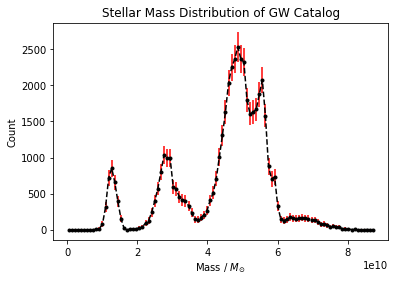

In [ ]:
# Mass distribution

print('range of Stellar Mass =', min(GWGC_with_mass['EST_STELLAR_M']), '--', max(GWGC_with_mass['EST_STELLAR_M']))

bins = 100

N, mass = np.histogram(GWGC_with_mass['EST_STELLAR_M'], bins, range = (0, max(GWGC_with_mass['EST_STELLAR_M'])))
#N, mass = np.histogram(Log_mass, bins, range = (0, max(Log_mass)))

mass_mid = (mass[1:] + mass[:-1]) / 2
plt.errorbar(mass_mid, N, yerr = 4*np.sqrt(N), fmt = 'k.', linestyle = '--', ecolor = 'r')

plt.xlabel('Mass / $M_{\odot}$')
plt.ylabel('Count')
plt.title('Stellar Mass Distribution of GW Catalog')
plt.savefig('Stellar_Mass_Distribution.png')
plt.show()

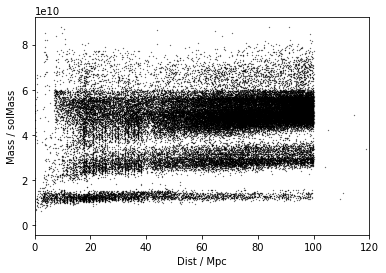

max Dist = 124.07
max Mass = 87649872093.02327


In [ ]:
# Mass vs Dist
plt.plot(GWGC_with_mass['Dist'], GWGC_with_mass['EST_STELLAR_M'], 'k.', markersize = 0.5)
plt.xlim(0, 120)
#plt.ylim(0, 180)
plt.xlabel('Dist / Mpc')
plt.ylabel('Mass / solMass')

plt.show()
print('max Dist =', max(GWGC_with_mass['Dist']))
print('max Mass =', max(GWGC_with_mass['EST_STELLAR_M']))

=====================================================================

Estimate Galaxy Metallicity

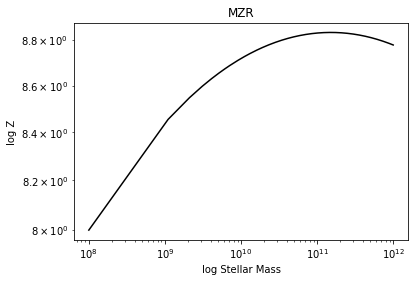

In [ ]:
# Plot of Tremonti 2004 MZR

# MZR boundary
ll = 1e8
ul = 1e12

x = np.linspace(ll, 1e12, 1000)
y = -1.492 + 1.847*np.log10(x) - 0.0826*np.log10(x)**2

plt.plot(x, y, color = 'k')
plt.xlabel('log Stellar Mass')
plt.ylabel('log Z')
plt.title('MZR')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
# Estimate Galaxy Metallicity from Tremonti 2004 MZ Relation

# Tremonti MZ Relation 2004
Z_log12 = -1.492 + 1.847*np.log10(GWGC_with_mass['EST_STELLAR_M']) - 0.0826*np.log10(GWGC_with_mass['EST_STELLAR_M'])**2 

# Converge 12+log(O/H) form to primordial metallicity
Z = 33.8286 * 10**(Z_log12 - 12) 

GWGC_COMPLETE = GWGC_with_mass # Final table for GWGC analysis

# Change galaxy mass to 10_12 solar mass
GWGC_COMPLETE['EST_STELLAR_M'] = np.round(GWGC_with_mass['EST_STELLAR_M'], decimals = 4)

GWGC_COMPLETE['EST_Z'] = np.round(Z, decimals = 4)

GWGC_COMPLETE

PGC,Name,RAhour,DEdeg,TT,Bmag,a,e_a,b,e_b,b/a,e_b/a,PA,BMAG,Dist,e_Dist,e_Bmag,e_BMAG,M_to_L,EST_M,EST_STELLAR_M,EST_Z
,,h,deg,,mag,arcmin,arcmin,arcmin,arcmin,,,deg,mag,Mpc,Mpc,mag,mag,,mag solMass,,
int32,bytes28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
595,NGC0005,0.13025,35.3623,-4.9,14.39,0.869,0.280,0.521,0.179,0.600,0.070,109.4,-19.99,72.14,10.82,0.34,0.35,8.5,1223150000000.0,60967864341.0853,0.0224
708,PGC000708,0.16857,-36.7751,-5.0,14.69,0.630,0.203,0.454,0.156,0.720,0.085,154.0,-20.22,95.35,14.30,0.28,0.29,8.5,1248650000000.0,62238910852.7132,0.0224
1037,NGC0057,0.25857,17.3284,-4.9,12.28,1.735,0.558,1.440,0.493,0.830,0.098,49.3,-22.19,77.85,11.68,0.15,0.16,8.5,1043800000000.0,52028170542.6357,0.0221
1185,PGC001185,0.30411,30.0632,-5.0,15.79,0.389,0.072,0.355,0.070,0.912,0.063,0.0,-19.14,93.94,20.67,0.55,0.56,8.5,1342150000000.0,66899414728.6822,0.0225
1206,PGC001206,0.31003,-6.3013,-5.0,14.89,0.398,0.128,0.247,0.085,0.620,0.073,140.0,-19.90,89.99,13.50,0.35,0.36,8.5,1265650000000.0,63086275193.7984,0.0224
1208,NGC0072A,0.30954,30.0363,-5.0,15.35,0.380,0.324,0.288,0.252,0.759,0.140,155.0,-19.60,94.94,20.89,0.09,0.13,8.5,1304750000000.0,65035213178.2946,0.0225
1216,IC0007,0.31480,10.5947,-5.0,14.08,0.354,0.114,0.336,0.115,0.950,0.112,174.5,-20.36,76.32,11.45,0.32,0.33,8.5,1196800000000.0,59654449612.4031,0.0223
1371,NGC0083,0.35625,22.4335,-4.8,13.23,0.931,0.300,0.866,0.297,0.930,0.109,112.0,-21.55,83.97,12.60,0.14,0.15,8.5,1124550000000.0,56053151162.7907,0.0222


In [ ]:
# Construct table for further use
# Take useful information from GWGC

GWGC_COMPLETE = GWGC_COMPLETE['PGC', 
                              'Name', 
                              'RAhour', 
                              'DEdeg', 
                              'TT', 
                              'Bmag', 
                              'Dist', 
                              'EST_STELLAR_M',
                              'EST_Z']

# Save Table to ram
ascii.write(GWGC_COMPLETE, 'GWGC_COMPLETE.csv', format='basic', fast_writer=False)
GWGC_COMPLETE

PGC,Name,RAhour,DEdeg,TT,Bmag,Dist,EST_STELLAR_M,EST_Z
,,h,deg,,mag,Mpc,,
int32,bytes28,float64,float64,float64,float64,float64,float64,float64
595,NGC0005,0.13025,35.3623,-4.9,14.39,72.14,60967864341.0853,0.0224
708,PGC000708,0.16857,-36.7751,-5.0,14.69,95.35,62238910852.7132,0.0224
1037,NGC0057,0.25857,17.3284,-4.9,12.28,77.85,52028170542.6357,0.0221
1185,PGC001185,0.30411,30.0632,-5.0,15.79,93.94,66899414728.6822,0.0225
1206,PGC001206,0.31003,-6.3013,-5.0,14.89,89.99,63086275193.7984,0.0224
1208,NGC0072A,0.30954,30.0363,-5.0,15.35,94.94,65035213178.2946,0.0225
1216,IC0007,0.31480,10.5947,-5.0,14.08,76.32,59654449612.4031,0.0223
1371,NGC0083,0.35625,22.4335,-4.8,13.23,83.97,56053151162.7907,0.0222


In [ ]:
# Save the file to the cloud and re-download
# Shareable link: https://drive.google.com/file/d/1awDCJTNXVyyKioq5Uw8mbTW1FG58PZJ2/view?usp=sharing

downloaded = drive.CreateFile({'id': '1awDCJTNXVyyKioq5Uw8mbTW1FG58PZJ2'}) # Replace the id with id of file you want to access
downloaded.GetContentFile('GWGC_COMPLETE.csv') #Put in the read file name

from astropy.io import ascii
GWGC_COMPLETE = ascii.read('GWGC_COMPLETE.csv', format='basic')

GWGC_COMPLETE

PGC,Name,RAhour,DEdeg,TT,Bmag,Dist,EST_STELLAR_M,EST_Z
int64,str23,float64,float64,float64,float64,float64,float64,float64
595,NGC0005,0.13025,35.3623,-4.9,14.39,72.14,60967864341.0853,0.0224
708,PGC000708,0.16857,-36.7751,-5.0,14.69,95.35,62238910852.7132,0.0224
1037,NGC0057,0.25857,17.3284,-4.9,12.28,77.85,52028170542.6357,0.0221
1185,PGC001185,0.30411,30.0632,-5.0,15.79,93.94,66899414728.6822,0.0225
1206,PGC001206,0.31003,-6.3013,-5.0,14.89,89.99,63086275193.7984,0.0224
1208,NGC0072A,0.30954,30.0363,-5.0,15.35,94.94,65035213178.2946,0.0225
1216,IC0007,0.3148,10.5947,-5.0,14.08,76.32,59654449612.4031,0.0223
1371,NGC0083,0.35625,22.4335,-4.8,13.23,83.97,56053151162.7907,0.0222
1442,NGC0097,0.37499,29.7454,-4.9,13.27,68.04,56222624031.0078,0.0222


range of Stellar Mass = 245735658.9147 -- 87649872093.0233
Range of Metallicity =  0.0052 -- 0.0228


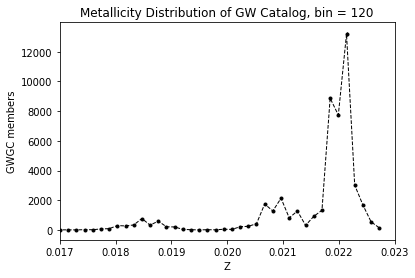

In [ ]:
# Metallicity Distribution

print('range of Stellar Mass =', min(GWGC_COMPLETE['EST_STELLAR_M']), '--', max(GWGC_COMPLETE['EST_STELLAR_M']))
print('Range of Metallicity = ', min(GWGC_COMPLETE['EST_Z']), '--', max(GWGC_COMPLETE['EST_Z']))

bins = 120
min_Z = min(GWGC_COMPLETE['EST_Z'])
max_Z = max(GWGC_COMPLETE['EST_Z'])

N, Z = np.histogram(GWGC_COMPLETE['EST_Z'], bins, range = (min_Z, max_Z))
Z_mid = (Z[1:] + Z[:-1]) / 2
plt.errorbar(Z_mid, N, yerr = np.sqrt(N), fmt = 'k.', linestyle = '--', linewidth = 1, ecolor = 'k')

# Metallicity distribution markers
#plt.axvline(x=0.01965, color='b')
#plt.axvline(x=0.02100, color='b')
#plt.axvline(x=0.02220, color='b')

plt.xlim(0.017, 0.023)
plt.xlabel('Z')
plt.ylabel('GWGC members')
plt.title('Metallicity Distribution of GW Catalog, bin = 120')
plt.savefig('Metallicity_Distribution.png')
plt.show()

Members of galaxy groups = 
 49184 0.0216 std = 0.001 
 1415 Z = 0.0224 std = 0.0002 
 1614 Z = 0.0225 std = 0.0001 
 28963 Z = 0.0221 std = 0.0002 
 5529 Z = 0.0219 std = 0.0002 
 2285 Z = 0.0212 std = 0.0002 
 6145 Z = 0.0208 std = 0.0002 
 3233 Z = 0.0185 std = 0.0004 



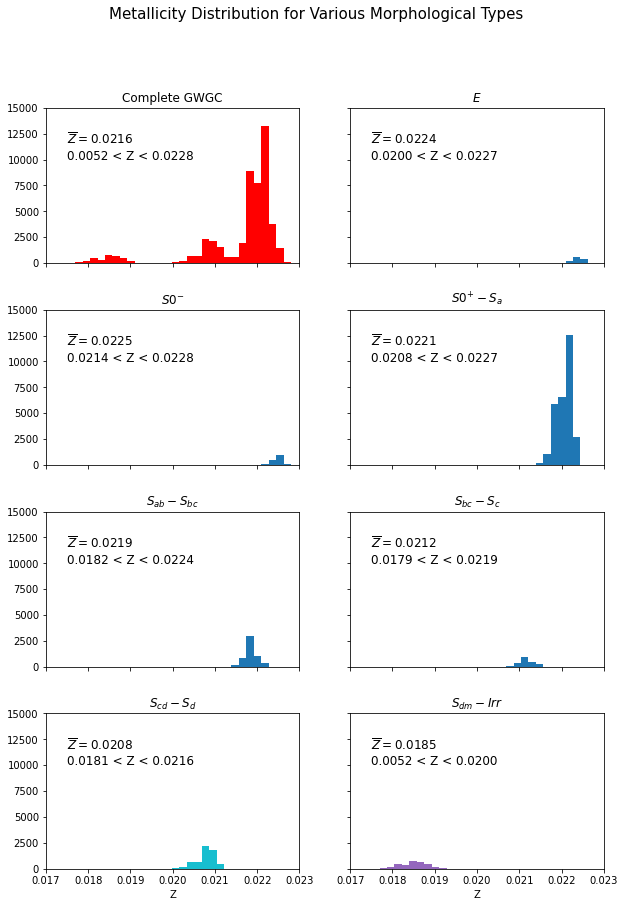

In [ ]:
# Metallicity Distribution for 7 types of galaxies

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, 
                                                                     sharey = False,
                                                                     gridspec_kw={'hspace': 0.3, 'wspace': 0.2},
                                                                     figsize = (10, 14))

fig.suptitle('Metallicity Distribution for Various Morphological Types', fontsize = 15)

bins = 100

# Complete distribution of metallicity
ax1.hist(GWGC_COMPLETE['EST_Z'], bins, range = (min_Z, max_Z), color='r')
ax1.set_title('Complete GWGC')
ax1.text(0.0175, 11500, 
         r'$\overline{Z} = 0.0216$', 
         fontsize=12)
ax1.text(0.0175, 10000, 
         r'0.0052 < Z < 0.0228', 
         fontsize=12)


# 1st type of galaxy
mask1 = GWGC_COMPLETE['TT'] >= -6
GWGC_Z1 = GWGC_COMPLETE[mask1]
mask1 = GWGC_Z1['TT'] <= -4.01
GWGC_Z1 = GWGC_Z1[mask1]

GWGC_Z1['GROUP'] = 1 # Assign group number

ax2.hist(GWGC_Z1['EST_Z'], bins, range = (min_Z, max_Z), color='tab:blue')
ax2.set_title('$E$')
ax2.text(0.0175, 11500, 
         r'$\overline{Z} = 0.0224$', 
         fontsize=12)
ax2.text(0.0175, 10000, 
         r'0.0200 < Z < 0.0227', 
         fontsize=12)

# 2nd type of galaxy
mask2 = GWGC_COMPLETE['TT'] >= -4
GWGC_Z2 = GWGC_COMPLETE[mask2]
mask2 = GWGC_Z2['TT'] <= -2.01
GWGC_Z2 = GWGC_Z2[mask2]

GWGC_Z2['GROUP'] = 2 # Assign group number

ax3.hist(GWGC_Z2['EST_Z'], bins, range = (min_Z, max_Z), color='tab:blue')
ax3.set_title('$S0^{-}$')
ax3.text(0.0175, 11500, 
         r'$\overline{Z} = 0.0225$', 
         fontsize=12)
ax3.text(0.0175, 10000, 
         r'0.0214 < Z < 0.0228', 
         fontsize=12)

# 3rd type of galaxy
mask3 = GWGC_COMPLETE['TT'] >= -2
GWGC_Z3 = GWGC_COMPLETE[mask3]
mask3 = GWGC_Z3['TT'] <= 0.99
GWGC_Z3 = GWGC_Z3[mask3]

GWGC_Z3['GROUP'] = 2 # Assign group number

ax4.hist(GWGC_Z3['EST_Z'], bins, range = (min_Z, max_Z), color='tab:blue')
ax4.set_title('$S0^{+} - S_a$')
ax4.text(0.0175, 11500, 
         r'$\overline{Z} = 0.0221$', 
         fontsize=12)
ax4.text(0.0175, 10000, 
         r'0.0208 < Z < 0.0227', 
         fontsize=12)

# 4th type of galaxy
mask4 = GWGC_COMPLETE['TT'] >= 1
GWGC_Z4 = GWGC_COMPLETE[mask4]
mask4 = GWGC_Z4['TT'] <= 3.99
GWGC_Z4 = GWGC_Z4[mask4]

GWGC_Z4['GROUP'] = 2 # Assign group number

ax5.hist(GWGC_Z4['EST_Z'], bins, range = (min_Z, max_Z), color='tab:blue')
ax5.set_title('$S_{ab} - S_{bc}$')
ax5.text(0.0175, 11500, 
         r'$\overline{Z} = 0.0219$', 
         fontsize=12)
ax5.text(0.0175, 10000, 
         r'0.0182 < Z < 0.0224', 
         fontsize=12)

# 5th type of galaxy
mask5 = GWGC_COMPLETE['TT'] >= 4
GWGC_Z5 = GWGC_COMPLETE[mask5]
mask5 = GWGC_Z5['TT'] <= 4.99
GWGC_Z5 = GWGC_Z5[mask5]

GWGC_Z5['GROUP'] = 2 # Assign group number

ax6.hist(GWGC_Z5['EST_Z'], bins, range = (min_Z, max_Z), color='tab:blue')
ax6.set_title('$S_{bc} - S_c$')
ax6.text(0.0175, 11500, 
         r'$\overline{Z} = 0.0212$', 
         fontsize=12)
ax6.text(0.0175, 10000, 
         r'0.0179 < Z < 0.0219', 
         fontsize=12)

# 6th type of galaxy
mask6 = GWGC_COMPLETE['TT'] >= 5
GWGC_Z6 = GWGC_COMPLETE[mask6]
mask6 = GWGC_Z6['TT'] <= 7.99
GWGC_Z6 = GWGC_Z6[mask6]

GWGC_Z6['GROUP'] = 3 # Assign group number

ax7.hist(GWGC_Z6['EST_Z'], bins, range = (min_Z, max_Z), color='tab:cyan')
ax7.set_title('$S_{cd} - S_d$')
ax7.text(0.0175, 11500, 
         r'$\overline{Z} = 0.0208$', 
         fontsize=12)
ax7.text(0.0175, 10000, 
         r'0.0181 < Z < 0.0216', 
         fontsize=12)

# 7th type of galaxy
mask7= GWGC_COMPLETE['TT'] >= 8
GWGC_Z7 = GWGC_COMPLETE[mask7]
mask7 = GWGC_Z7['TT'] <= 10
GWGC_Z7 = GWGC_Z7[mask7]

GWGC_Z7['GROUP'] = 4 # Assign group number

ax8.hist(GWGC_Z7['EST_Z'], bins, range = (min_Z, max_Z), color='tab:purple')
ax8.set_title('$S_{dm} - Irr$')
ax8.text(0.0175, 11500, 
         r'$\overline{Z} = 0.0185$', 
         fontsize=12)
ax8.text(0.0175, 10000, 
         r'0.0052 < Z < 0.0200', 
         fontsize=12)

# Plotting styles

ax7.set(xlabel='Z')
ax8.set(xlabel='Z')

for ax in fig.get_axes():
    ax.label_outer()

for ax in fig.get_axes():
    ax.set_xlim(0.017, 0.023)

for ax in fig.get_axes():
    ax.set_ylim(0, 15000)


# Memebers of each type
print('Members of galaxy groups =', '\n',
      len(GWGC_COMPLETE), round(np.mean(GWGC_COMPLETE['EST_Z']), 4), 'std =', round(np.std(GWGC_COMPLETE['EST_Z']), 4), '\n',
      len(GWGC_Z1), 'Z =', round(np.mean(GWGC_Z1['EST_Z']), 4), 'std =', round(np.std(GWGC_Z1['EST_Z']), 4), '\n',
      len(GWGC_Z2), 'Z =', round(np.mean(GWGC_Z2['EST_Z']), 4), 'std =', round(np.std(GWGC_Z2['EST_Z']), 4), '\n',
      len(GWGC_Z3), 'Z =', round(np.mean(GWGC_Z3['EST_Z']), 4), 'std =', round(np.std(GWGC_Z3['EST_Z']), 4), '\n',
      len(GWGC_Z4), 'Z =', round(np.mean(GWGC_Z4['EST_Z']), 4), 'std =', round(np.std(GWGC_Z4['EST_Z']), 4), '\n',
      len(GWGC_Z5), 'Z =', round(np.mean(GWGC_Z5['EST_Z']), 4), 'std =', round(np.std(GWGC_Z5['EST_Z']), 4), '\n',
      len(GWGC_Z6), 'Z =', round(np.mean(GWGC_Z6['EST_Z']), 4), 'std =', round(np.std(GWGC_Z6['EST_Z']), 4), '\n',
      len(GWGC_Z7), 'Z =', round(np.mean(GWGC_Z7['EST_Z']), 4), 'std =', round(np.std(GWGC_Z7['EST_Z']), 4), '\n',)

plt.savefig('Metallicity_Distribution_Full.png')
plt.show()

In [ ]:
# Metallicity Z for each catagory

# Group 1 Elliptical galaxy
print(np.mean(GWGC_Z1['EST_Z']))

# Group 2 Spiral galaxy
print(np.mean(np.concatenate((GWGC_Z2['EST_Z'], GWGC_Z3['EST_Z'], GWGC_Z4['EST_Z'], GWGC_Z5['EST_Z']))))

# Group 3 S_cd - S_d
print(np.mean(GWGC_Z6['EST_Z']))

# Group 4 Irragular galaxy
print(np.mean(GWGC_Z7['EST_Z']))


# Generate table for DATA_ANALISYS
GWGC_COMPLETE_Categorized = vstack([GWGC_Z1, GWGC_Z2, GWGC_Z3, GWGC_Z4, GWGC_Z5, GWGC_Z6, GWGC_Z7])
# Save Table to ram
ascii.write(GWGC_COMPLETE_Categorized, 'GWGC_COMPLETE_Categorized_Astropy.csv', format='basic', fast_writer=False)
GWGC_COMPLETE_Categorized

0.022357243816254417
0.021990359719725978
0.02076211554109032
0.01847813176616146


PGC,Name,RAhour,DEdeg,TT,Bmag,Dist,EST_STELLAR_M,EST_Z,GROUP
int64,str23,float64,float64,float64,float64,float64,float64,float64,int64
595,NGC0005,0.13025,35.3623,-4.9,14.39,72.14,60967864341.0853,0.0224,1
708,PGC000708,0.16857,-36.7751,-5.0,14.69,95.35,62238910852.7132,0.0224,1
1037,NGC0057,0.25857,17.3284,-4.9,12.28,77.85,52028170542.6357,0.0221,1
1185,PGC001185,0.30411,30.0632,-5.0,15.79,93.94,66899414728.6822,0.0225,1
1206,PGC001206,0.31003,-6.3013,-5.0,14.89,89.99,63086275193.7984,0.0224,1
1208,NGC0072A,0.30954,30.0363,-5.0,15.35,94.94,65035213178.2946,0.0225,1
1216,IC0007,0.3148,10.5947,-5.0,14.08,76.32,59654449612.4031,0.0223,1
1371,NGC0083,0.35625,22.4335,-4.8,13.23,83.97,56053151162.7907,0.0222,1
1442,NGC0097,0.37499,29.7454,-4.9,13.27,68.04,56222624031.0078,0.0222,1


In [ ]:
# Converge table into Pandas DataFrame
# Painful, but nessesary for the consistency with COSMIC data

import pandas as pd

GWGC_COMPLETE_Categorized
step = np.array([GWGC_COMPLETE_Categorized['PGC'], 
                 GWGC_COMPLETE_Categorized['Name'],
                 GWGC_COMPLETE_Categorized['RAhour'],
                 GWGC_COMPLETE_Categorized['DEdeg'],
                 GWGC_COMPLETE_Categorized['TT'],
                 GWGC_COMPLETE_Categorized['Bmag'],
                 GWGC_COMPLETE_Categorized['Dist'],
                 GWGC_COMPLETE_Categorized['EST_STELLAR_M'],
                 GWGC_COMPLETE_Categorized['EST_Z'],
                 GWGC_COMPLETE_Categorized['GROUP']]).T

step = pd.DataFrame(step)
step.columns =['PGC', 'Name', 'RAhour', 'DEdeg', 'TT', 'Bmag',
               'Dist', 'EST_STELLAR_M', 'EST_Z', 'GROUP'] 

step.to_csv('GWGC_COMPLETE_Categorized.csv')
print(step)

           PGC                     Name  ...   EST_Z GROUP
0          595                  NGC0005  ...  0.0224     1
1          708                PGC000708  ...  0.0224     1
2         1037                  NGC0057  ...  0.0221     1
3         1185                PGC001185  ...  0.0225     1
4         1206                PGC001206  ...  0.0224     1
...        ...                      ...  ...     ...   ...
49179  4215191  SDSSJ095100.45+200420.9  ...   0.019     4
49180  4231240  SDSSJ101726.52+292210.6  ...  0.0187     4
49181  4541250  SDSSJ150349.93+005831.7  ...  0.0188     4
49182  4581793               PGC4581793  ...  0.0191     4
49183  4614915                PGC826105  ...  0.0191     4

[49184 rows x 10 columns]


In [ ]:
# Re-download to check
# link:
# https://drive.google.com/file/d/1XS85QhMJzogGXnjzCNf0szRWjP04RkPe/view?usp=sharing

downloaded = drive.CreateFile({'id': '1XS85QhMJzogGXnjzCNf0szRWjP04RkPe'}) # Replace the id with id of file you want to access
downloaded.GetContentFile('GWGC_COMPLETE_Categorized.csv') #Put in the read file name

GWGC_COMPLETE_Categorized = []
GWGC_COMPLETE_Categorized = pd.read_csv('GWGC_COMPLETE_Categorized.csv')

print(GWGC_COMPLETE_Categorized)

       Unnamed: 0      PGC  ...   EST_Z  GROUP
0               0      595  ...  0.0224      1
1               1      708  ...  0.0224      1
2               2     1037  ...  0.0221      1
3               3     1185  ...  0.0225      1
4               4     1206  ...  0.0224      1
...           ...      ...  ...     ...    ...
49179       49179  4215191  ...  0.0190      4
49180       49180  4231240  ...  0.0187      4
49181       49181  4541250  ...  0.0188      4
49182       49182  4581793  ...  0.0191      4
49183       49183  4614915  ...  0.0191      4

[49184 rows x 11 columns]
